<h2>Importing the libraries

In [26]:
import numpy as np
import pickle 

<h2>Reading all the datas provided in the data set

In [27]:
with open('test_image.pkl', 'rb') as q:
    test = pickle.load(q)
with open('train_image.pkl', 'rb') as q:
    train_data = pickle.load(q)
with open('train_label.pkl', 'rb') as q:
    train_label = pickle.load(q)

<h2>Resolving all the data to numpy array

In [28]:
test = np.array(test)
train_data = np.array(train_data)
train_label = np.array(train_label)

In [29]:
print("shape of train data :", train_data.shape)
print("shape of train label :", train_label.shape)
print("shape of test data :", test.shape)

shape of train data : (8000, 784)
shape of train label : (8000,)
shape of test data : (2000, 784)


<h2>Changing the shape of the data</h2>

In [30]:
x_train = train_data.reshape(len(train_data), 28,28)
train_y = train_label
x_test = test.reshape(len(test), 28,28)
print(x_train.shape,train_y.shape, x_test.shape)

(8000, 28, 28) (8000,) (2000, 28, 28)


<h2>Normalisation to be done for keeping the value between 0 AND 1

In [31]:
x_train = x_train /255.0
x_test = x_test / 255.0

<h2>Plotting the training data with labels</h2>

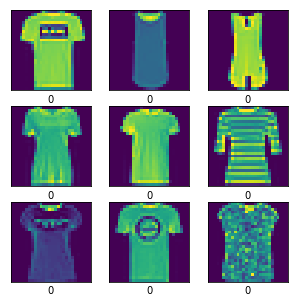

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (5, 5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('on')
    plt.imshow(x_train[i])
    plt.xlabel(train_label[i]) # Getting the labels as per index

<h2>Model Definition and Description</h2>

In [10]:
import keras
import tensorflow as tf

Using TensorFlow backend.


<b>1:</b> Flatten the image array to 1-D array <b>keras.layers.Flatten</b>

<b>2:</b> Map it to a hidden layer which has 64 neurons and sigmoid as activation function

<b>3:</b> Map the hidden layer to the output layer that has 7 output neurons, because the given train_label = (0,2,3,6) so the model takes the max value of labels as the number of assuming it has started from 0. And it gives an array having the probability distributions of classes.




In [33]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(64, activation=tf.nn.sigmoid))
model.add(keras.layers.Dense(64, activation=tf.nn.sigmoid))
model.add(keras.layers.Dense(7,activation=tf.nn.softmax))

<h2>Compile the model</h2><br>
Here <b>Adam optimizer</b> is used as the optimization algorithm  and <b>categorical crossentropy</b> as the loss function.

In [35]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

<h2>Fitting the data</h2>

In [36]:
model.fit(x_train, train_label, epochs = 30)

Epoch 1/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.9351 - acc: 0.6527
Epoch 2/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.5824 - acc: 0.7679
Epoch 3/30
8000/8000 [==============================] - 0s 57us/step - loss: 0.5065 - acc: 0.8029: 0s - loss: 0.5081 - acc: 0.8
Epoch 4/30
8000/8000 [==============================] - 0s 55us/step - loss: 0.4668 - acc: 0.8166
Epoch 5/30
8000/8000 [==============================] - 0s 60us/step - loss: 0.4421 - acc: 0.8267
Epoch 6/30
8000/8000 [==============================] - 1s 65us/step - loss: 0.4261 - acc: 0.8296
Epoch 7/30
8000/8000 [==============================] - 0s 62us/step - loss: 0.4119 - acc: 0.8371
Epoch 8/30
8000/8000 [==============================] - 0s 61us/step - loss: 0.3987 - acc: 0.8438
Epoch 9/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.3863 - acc: 0.8522
Epoch 10/30
8000/8000 [==============================] - 0s 53us/step - loss: 0.3776 - a

<h2>Output</h2>

In [37]:
output = model.predict(x_test)

output

array([[9.7673917e-01, 1.9036443e-06, 1.0824685e-03, ..., 3.7735247e-06,
        4.9951764e-06, 2.1565855e-02],
       [8.5218418e-01, 7.3612478e-06, 4.3619112e-03, ..., 1.0799232e-05,
        1.5549915e-05, 1.3460846e-01],
       [9.8548955e-01, 4.2130711e-07, 5.3011285e-05, ..., 1.0370387e-06,
        1.6665182e-06, 1.4440847e-02],
       ...,
       [6.2408984e-02, 8.6256523e-06, 9.6277194e-03, ..., 1.0048447e-05,
        2.7834176e-05, 7.8739995e-01],
       [1.5996426e-03, 3.0616379e-06, 5.4307405e-02, ..., 3.0325498e-06,
        1.2679503e-05, 9.4401968e-01],
       [2.9480743e-04, 3.6911899e-07, 8.4869936e-04, ..., 3.1685445e-07,
        2.3180628e-06, 9.9880707e-01]], dtype=float32)

<h2>Getting the predicted classes of the test data

In [38]:
final_out = []
for index,predict in enumerate (output):
    output = []
    output.append(index)
    output.append(np.argmax(predict))
    final_out.append(output)    

In [39]:
final_out=np.array(final_out).tolist()
final_out

[[0, 0],
 [1, 0],
 [2, 0],
 [3, 0],
 [4, 0],
 [5, 0],
 [6, 0],
 [7, 0],
 [8, 0],
 [9, 0],
 [10, 0],
 [11, 0],
 [12, 3],
 [13, 0],
 [14, 0],
 [15, 6],
 [16, 0],
 [17, 0],
 [18, 0],
 [19, 0],
 [20, 0],
 [21, 0],
 [22, 0],
 [23, 0],
 [24, 0],
 [25, 0],
 [26, 6],
 [27, 0],
 [28, 0],
 [29, 0],
 [30, 0],
 [31, 0],
 [32, 0],
 [33, 0],
 [34, 0],
 [35, 0],
 [36, 0],
 [37, 0],
 [38, 0],
 [39, 6],
 [40, 6],
 [41, 0],
 [42, 0],
 [43, 0],
 [44, 0],
 [45, 0],
 [46, 0],
 [47, 2],
 [48, 0],
 [49, 0],
 [50, 0],
 [51, 0],
 [52, 0],
 [53, 0],
 [54, 0],
 [55, 0],
 [56, 0],
 [57, 0],
 [58, 0],
 [59, 0],
 [60, 3],
 [61, 0],
 [62, 0],
 [63, 0],
 [64, 0],
 [65, 0],
 [66, 0],
 [67, 0],
 [68, 0],
 [69, 0],
 [70, 0],
 [71, 0],
 [72, 0],
 [73, 0],
 [74, 6],
 [75, 0],
 [76, 0],
 [77, 0],
 [78, 0],
 [79, 0],
 [80, 0],
 [81, 0],
 [82, 0],
 [83, 0],
 [84, 0],
 [85, 0],
 [86, 0],
 [87, 0],
 [88, 0],
 [89, 0],
 [90, 0],
 [91, 0],
 [92, 0],
 [93, 0],
 [94, 0],
 [95, 0],
 [96, 0],
 [97, 0],
 [98, 2],
 [99, 6],
 [100, 0],

<h2>Adding output to .csv file</h2>

In [17]:
np.savetxt("suman_goel.csv",final_out,delimiter=",")